# About this notebook
We use this model to perform explanatory data analysis (EDA) on the preprocessed dataframe located in 'data/preprocessed'.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme(style='whitegrid')
pd.options.mode.chained_assignment = None  # Supress warning, default='warn'

# Read Data

In [25]:
df = pd.read_csv('../data/preprocessed/accepted_2007_to_2018Q4_preprocessed.csv')
df.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,68476807,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
4,68426831,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,Veterinary Tecnician,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


# EDA
In the following sections we explore our data set, i.e. we apply EDA.

In [59]:
# Get Number of Non-Default (0) and Default (1)
loan_status_value_count = df['loan_status'].value_counts()
print(loan_status_value_count)

n_non_default = loan_status_value_count[0]
n_default = loan_status_value_count[1]

0    1076751
1     268559
Name: loan_status, dtype: int64


## Loan Distribution

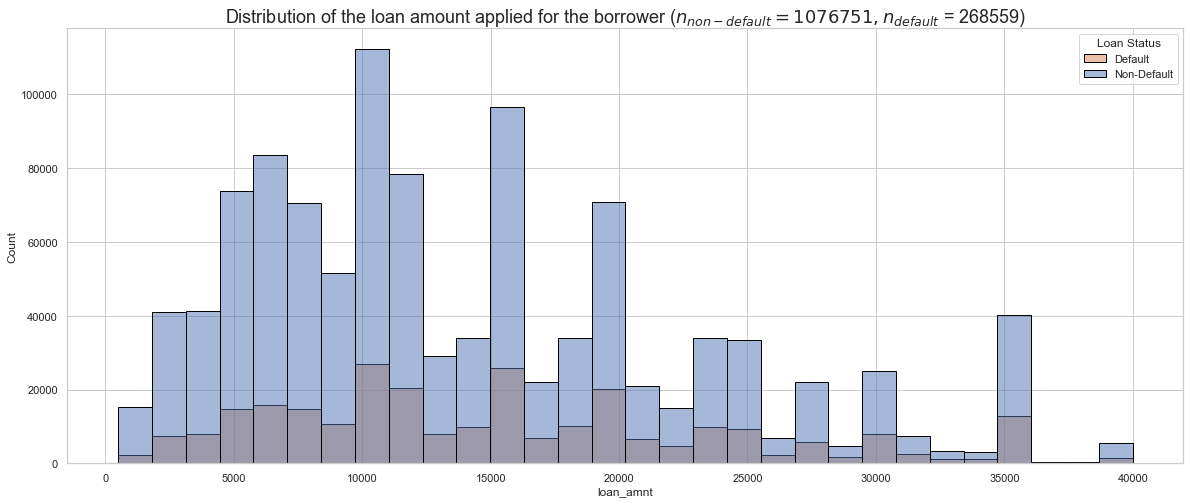

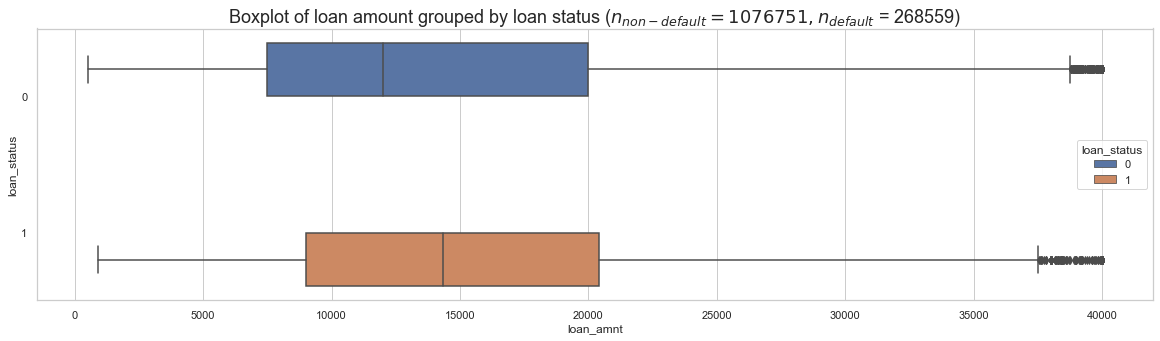

loan_amnt                                                \
                  count      mean      std     min      25%       50%   
loan_status                                                             
0            1076751.00  14134.37  8669.03  500.00  7500.00  12000.00   
1             268559.00  15565.06  8814.56  900.00  9000.00  14350.00   

                                 
                  75%       max  
loan_status                      
0            20000.00  40000.00  
1            20400.00  40000.00

In [83]:
# Plot Loan amount distribution
plt.figure(figsize=(20, 8))
plt.title(f"Distribution of the loan amount applied for the borrower "
          f"($n_{{non-default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.histplot(data=df, x='loan_amnt', bins=30, edgecolor='black', hue='loan_status', multiple='layer')
plt.legend(title='Loan Status', labels=['Default', 'Non-Default'])
plt.show()

# Plot boxplot
plt.figure(figsize=(20, 5))
plt.title(f"Boxplot of loan amount grouped by loan "
          f"status ($n_{{non-default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.boxplot(data=df, x='loan_amnt', y='loan_status', orient='h', hue='loan_status')
#plt.legend(title='Loan Status', labels=['Default', 'Non-Default'])
plt.show()

# Get descriptive statistics from loan_amnt grouped by status
df[['loan_amnt','loan_status']].groupby('loan_status').describe().applymap('{:.2f}'.format)